[0 1 0 0 0 0 0]
[0.    1.807 0.    0.    0.    0.    0.   ]
[-1.110e-16  3.409e-01 -1.205e-01 -4.163e-16 -1.110e-16 -9.323e-01
 -2.426e-17]


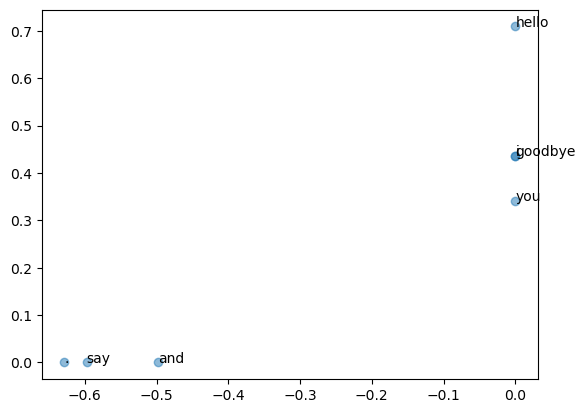

In [ ]:
# coding: utf-8

# sys 모듈을 불러와서 시스템 경로를 설정
import sys
# 상위 폴더에 있는 'dataset' 모듈을 import 가능하게 함
sys.path.append('..') # 상위 디렉토리를 모듈 검색 경로에 추가

# 전처리 및 통계 기반 단어 임베딩 관련 함수들을 불러옴
import numpy as np # numpy를 import하고, numpy -> np로 줄여서 부르기로 함.
import matplotlib.pyplot as plt # 'matplotlib' 폴더 안의 'pyplot.py' 모듈을 import하고 -> plt로 줄여서 부르기로 함.
from common.util import preprocess, create_co_matrix, ppmi # 'common' 폴더 안의 'util.py' 모듈에서 전처리 및 단어 임베딩 관련 함수 import

# 분석할 텍스트 정의
text = 'You say goodbye and I say hello.'

corpus, word_to_id, id_to_word = preprocess(text) # 텍스트 전처리 - 말뭉치, 단어->ID 맵, ID->단어 맵 생성
vocab_size = len(id_to_word) # 어휘 수
C = create_co_matrix(corpus, vocab_size, window_size=1) # 동시발생 행렬 생성 (윈도우 크기 1 -> 앞뒤 1개 단어만 고려)
W = ppmi(C) # 동시발생 행렬 -> PPMI 행렬
# PMI는 두 단어가 같이 등장할 확률과 각각 독립적으로 등장할 확률을 비교
# 음의 PMI는 잘라내고 양의 PMI만 유지 (노이즈 제거 목적)

# SVD - 차원 축소 (W = U * S * V^T)
U, S, V = np.linalg.svd(W)

# 특정 단어(ID=0)의 동시발생 벡터, PPMI 벡터, SVD 결과 출력
np.set_printoptions(precision=3)  # 유효 자릿수를 세 자리로 표시
print(C[0]) # 동시발생 행렬의 첫 번째 행
print(W[0]) # 동시발생 행렬의 두 번째 행
print(U[0]) # 동시발생 행렬의 세 번째 행

# 플롯 - 2차원 평면에 단어 임베딩 결과 시각화
for word, word_id in word_to_id.items():
    plt.annotate(word, (U[word_id, 0], U[word_id, 1]))
plt.scatter(U[:,0], U[:,1], alpha=0.5)
# 단어 벡터의 첫 번째, 두 번째 성분을 좌표로 하여 산점도 그리기
# alpha=0.5는 점을 반투명하게 하여 겹칠 때도 보이게 함
plt.show()